In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('forest_cover.csv')
df.head()
df = df.sample(25000)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
42446,2959,61,16,85,10,5245,231,206,103,2663,...,0,0,0,0,0,0,0,0,0,1
149421,3100,38,15,30,-2,4202,218,205,118,2980,...,0,0,0,0,0,0,0,0,0,1
395891,3179,89,14,360,63,2293,240,217,104,2889,...,0,0,0,0,0,0,0,0,0,1
25419,2847,41,13,524,59,3376,221,210,122,6295,...,0,0,0,0,0,0,0,0,0,2
157437,2752,9,15,127,3,1176,202,210,142,2311,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177015,3120,77,3,361,34,3571,224,233,145,1034,...,0,0,0,0,0,0,0,0,0,1
475353,2997,205,29,361,157,1018,190,251,180,424,...,0,0,0,0,0,0,0,0,0,2
5197,3275,61,7,30,0,3814,226,225,133,3774,...,0,0,0,0,0,0,1,0,0,7
521900,3161,302,16,309,85,2980,175,232,196,1184,...,1,0,0,0,0,0,0,0,0,1


In [2]:
from sklearn.model_selection import train_test_split

test_df_y = df["Cover_Type"]
del df["Cover_Type"]
test_df_x = df

Y_values = test_df_y.values
X_values = test_df_x.values

X_train, X_test, y_train, y_test = train_test_split(X_values, Y_values, test_size=0.25)





In [11]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(C=0.000000001,solver='liblinear',max_iter=1000)
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1e-09, max_iter=10000, solver='liblinear')

In [4]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=1000, random_state=42)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

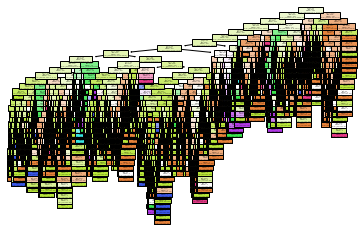

In [8]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
rand_forest_estimators = rand_forest.estimators_
tree.plot_tree(rand_forest_estimators[0],
               filled = True);



Gini is a measure of how accurate the model could be if it randomly guessed the class of a sample, based on the distribution of classes in the node. If the gini is higher, that means there is less certainty about the conclusions that can be drawn because there is more uncertainty in how the samples are divided. Gini values will always get smaller as we move down the tree. Similarly, samples refers to the number of samples observed in the node, which will also decrease as you go down the tree since the observations are being divided into classes at each step. The value just refers to the class distribution of the samples in the node. The conditions refers to the other features present that could help determine future classifications.

In [14]:
from sklearn.metrics import accuracy_score

lr_predictions = logisticRegr.predict(X_test)

accuracy_score(y_test, lr_predictions)

0.6088

In [15]:
rf_predictions = rand_forest.predict(X_test)

accuracy_score(y_test, rf_predictions)

0.84464

In [16]:
dt_predictions = dec_tree.predict(X_test)

accuracy_score(y_test, dt_predictions)

0.7688

In [17]:
cm = metrics.confusion_matrix(y_test, rf_predictions)
print(cm)

[[1886  361    0    0    1    0   14]
 [ 279 2748   25    0    5   14    3]
 [   0   17  315    3    1   21    0]
 [   0    0    4   16    0    1    0]
 [   0   72    0    0   36    0    0]
 [   0   36   50    1    0   83    0]
 [  61    2    0    0    0    0  195]]


Due to the high number of features, Random Forest is more accurate because decisions are made based on a subset of features, and thus the permutations of feature combinations create less ambiguity in the model's predictive ability